<a href="https://colab.research.google.com/github/Cehiim/ValidationMetrics/blob/main/ConfusionMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparando treinamento

In [1]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
tensorboard_callback = tf.keras.callbacks.TensorBoard('log', histogram_freq=1)

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
            y=train_labels,
            epochs=5,
            validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 34ms/step - accuracy: 0.8914 - loss: 0.3430 - val_accuracy: 0.9799 - val_loss: 0.0608
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 29ms/step - accuracy: 0.9834 - loss: 0.0508 - val_accuracy: 0.9883 - val_loss: 0.0328
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9893 - loss: 0.0333 - val_accuracy: 0.9874 - val_loss: 0.0371
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9924 - loss: 0.0247 - val_accuracy: 0.9904 - val_loss: 0.0278
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9940 - loss: 0.0194 - val_accuracy: 0.9918 - val_loss: 0.0276


In [44]:
y_true=test_labels

y_pred_probs = model.predict(test_images)
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [92]:
classes=[0,1,2,3,4,5,6,7,8,9]

# Matriz de confusão

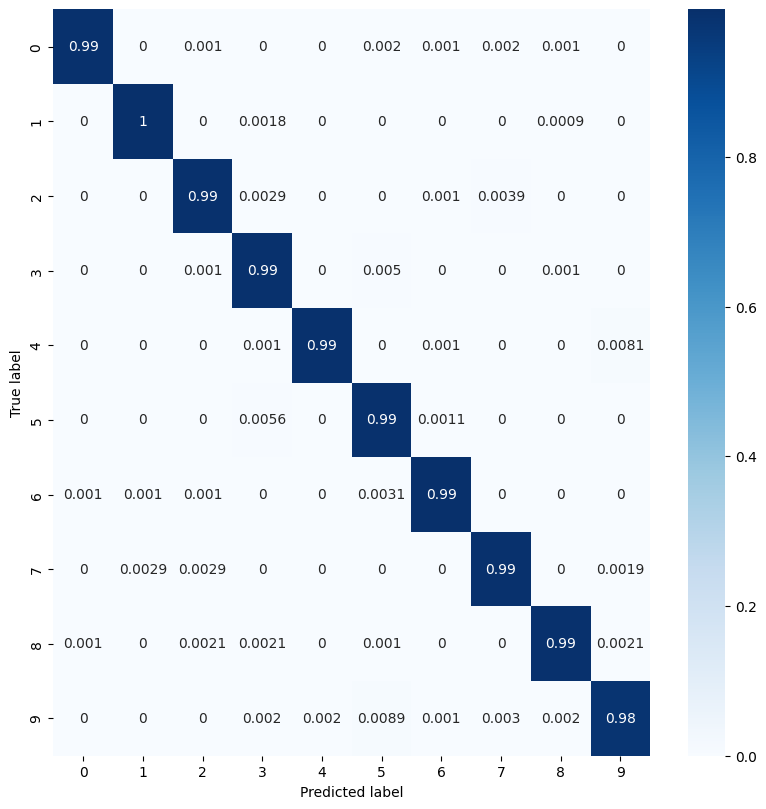

In [127]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=4)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Métricas para avaliação

## Implementação

In [306]:
con_mat

array([[ 973,    0,    1,    0,    0,    2,    1,    2,    1,    0],
       [   0, 1132,    0,    2,    0,    0,    0,    0,    1,    0],
       [   0,    0, 1024,    3,    0,    0,    1,    4,    0,    0],
       [   0,    0,    1, 1003,    0,    5,    0,    0,    1,    0],
       [   0,    0,    0,    1,  972,    0,    1,    0,    0,    8],
       [   0,    0,    0,    5,    0,  886,    1,    0,    0,    0],
       [   1,    1,    1,    0,    0,    3,  952,    0,    0,    0],
       [   0,    3,    3,    0,    0,    0,    0, 1020,    0,    2],
       [   1,    0,    2,    2,    0,    1,    0,    0,  966,    2],
       [   0,    0,    0,    2,    2,    9,    1,    3,    2,  990]],
      dtype=int32)

In [307]:
total = con_mat.sum()
n = con_mat.shape[0]

In [308]:
vp = np.zeros(n)
vn = np.zeros(n)
fp = np.zeros(n)
fn = np.zeros(n)

for i in range(n):
  for j in range(n):
    if(i == j):
      vp[i] += con_mat[i][j]
    else:
      if(j > i):
        fn[i] += con_mat[i][j]
        fp[i] += con_mat[j][i]
  vn[i] = total - (vp[i] + fn[i] + fp[i])

In [309]:
df = pd.DataFrame({
    'VP': vp,
    'VN': vn,
    'FP': fp,
    'FN': fn
    }, index=[f'Classe {i}' for i in range(n)])
#df

In [310]:
df['Sensibilidade'] = round(100 * df['VP'] / (df['VP']+df['FN']), 2)
df['Especificidade'] = round(100 * df['VN'] / (df['FP']+df['VN']), 2)
df['Acurácia'] = round(100 * (df['VP']+df['VN']) / total, 2)
df['Precisão'] = round(100 * df['VP'] / (df['VP']+df['FP']), 2)
df['F-Score'] = round(2 * df['Precisão'] * df['Sensibilidade'] / (df['Precisão']+df['Sensibilidade']), 2)
#df

## Resultados

In [311]:
print(f'''
Amostras totais: {total}
Classes totais: {n}
''')


Amostras totais: 10000
Classes totais: 10



In [312]:
df

,VP,VN,FP,FN,Sensibilidade,Especificidade,Acurácia,Precisão,F-Score
Classe 0,973.0,9018.0,2.0,7.0,99.29,99.98,99.91,99.79,99.54
Classe 1,1132.0,8861.0,4.0,3.0,99.74,99.95,99.93,99.65,99.69
Classe 2,1024.0,8961.0,7.0,8.0,99.22,99.92,99.85,99.32,99.27
Classe 3,1003.0,8981.0,10.0,6.0,99.41,99.89,99.84,99.01,99.21
Classe 4,972.0,9017.0,2.0,9.0,99.08,99.98,99.89,99.79,99.43
Classe 5,886.0,9100.0,13.0,1.0,99.89,99.86,99.86,98.55,99.22
Classe 6,952.0,9047.0,1.0,0.0,100.00,99.99,99.99,99.90,99.95
Classe 7,1020.0,8975.0,3.0,2.0,99.80,99.97,99.95,99.71,99.75
Classe 8,966.0,9030.0,2.0,2.0,99.79,99.98,99.96,99.79,99.79
Classe 9,990.0,9010.0,0.0,0.0,100.00,100.00,100.00,100.00,100.00
